<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Draw-hit-event-vertical-line" data-toc-modified-id="Draw-hit-event-vertical-line-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Draw hit event vertical line</a></span></li><li><span><a href="#RMS" data-toc-modified-id="RMS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RMS</a></span><ul class="toc-item"><li><span><a href="#Consider--left--arm" data-toc-modified-id="Consider--left--arm-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Consider <font color="red"> left </font> arm</a></span></li><li><span><a href="#consider--right--arm" data-toc-modified-id="consider--right--arm-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>consider <font color="red"> right </font> arm</a></span></li><li><span><a href="#Put-two-arms-together" data-toc-modified-id="Put-two-arms-together-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Put two arms together</a></span></li></ul></li></ul></div>

At first, concentrate on the who_id=7, song_id=1, performance_order=3 case.
```
bb_capture.capture_2018_03_28_15_03_47
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import sys
import math

from datetime import datetime, timedelta
from tqdm import tqdm

LEFT_PATH = '../data/bb_left_forearm_csv/'
RIGHT_PATH = '../data/bb_right_forearm_csv/'
TABLE_PATH = '../data/taiku_tables/'
PATH = '../data/bb_capture/'
OUTPUT_PATH = '../output/'
PROCESSED_PATH = '../data/'

# Draw hit event vertical line

In [2]:
files = next(os.walk(LEFT_PATH))[2]
left_df = [
    pd.read_csv(LEFT_PATH + filename, dtype={
        'timestamp': np.float64
    }) for filename in files
]
left_df = pd.concat(left_df, ignore_index=True)
left_df.drop('key', axis=1, inplace=True)
files

['data_2018_03_27_13_25_43.csv',
 'data_2018_03_28_15_52_48.csv',
 'data_2018_03_27_14_48_28.csv',
 'data_2018_03_28_16_59_47.csv',
 'data_2018_03_27_11_37_57.csv',
 'data_2018_03_28_14_52_45.csv',
 'data_2018_03_27_16_12_02.csv',
 'data_2018_03_31_15_29_36.csv']

In [3]:
files = next(os.walk(RIGHT_PATH))[2]
right_df = [
    pd.read_csv(RIGHT_PATH + filename, dtype={
        'timestamp': np.float64
    }) for filename in files
]
right_df = pd.concat(right_df, ignore_index=True)
right_df.drop('key', axis=1, inplace=True)
files

['data_2018_03_27_11_40_03.csv',
 'data_2018_03_28_16_59_37.csv',
 'data_2018_03_27_14_50_24.csv',
 'data_2018_03_28_14_52_43.csv',
 'data_2018_03_31_15_29_27.csv',
 'data_2018_03_27_16_14_52.csv',
 'data_2018_03_28_15_52_55.csv',
 'data_2018_03_27_13_20_28.csv']

**Hit_type**

```
1: Dong_small
2:Ka_small
3: Dong_big
4:Ka_big
5:small_Hit_stream
6:big_Hit_steam
```

In [4]:
song_df = pd.read_csv(TABLE_PATH + 'taiko_song_1_info.csv')
song_df.drop(['#', 'separator'], axis=1, inplace=True)
song_df.columns = ['bar', 'bpm', 'time_unit', 'timestamp', 'label', 'continuous', 'value']
song_df.head(10)

,bar,bpm,time_unit,timestamp,label,continuous,value
0,1,123,0.2439,0.0000,1,0,1
1,1,123,0.2439,0.2439,0,0,0
2,1,123,0.2439,0.4878,0,0,0
3,1,123,0.2439,0.7317,0,0,0
4,1,123,0.2439,0.9756,1,0,1
5,1,123,0.2439,1.2195,0,0,0
6,1,123,0.2439,1.4634,0,0,0
7,1,123,0.2439,1.7073,0,0,0
8,2,123,0.2439,1.9512,1,0,1
9,2,123,0.2439,2.1951,0,0,0


colors picked the same as taoyi's.

In [5]:
COLORS = ['black', 'red', 'blue', 'yellow', 'green', 'cyan', 'purple']

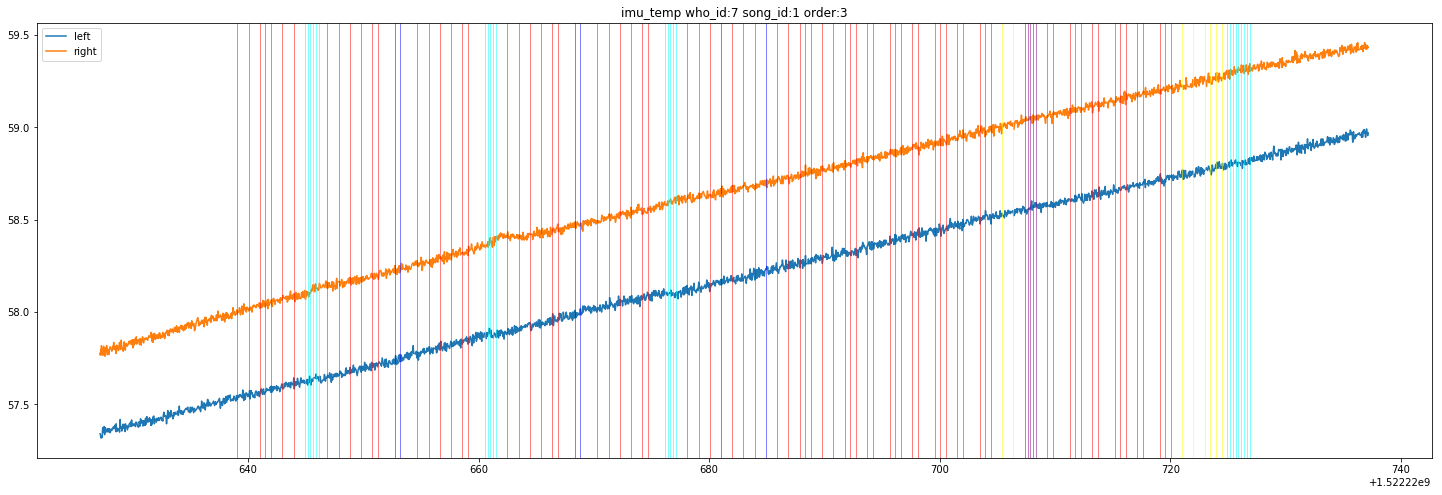

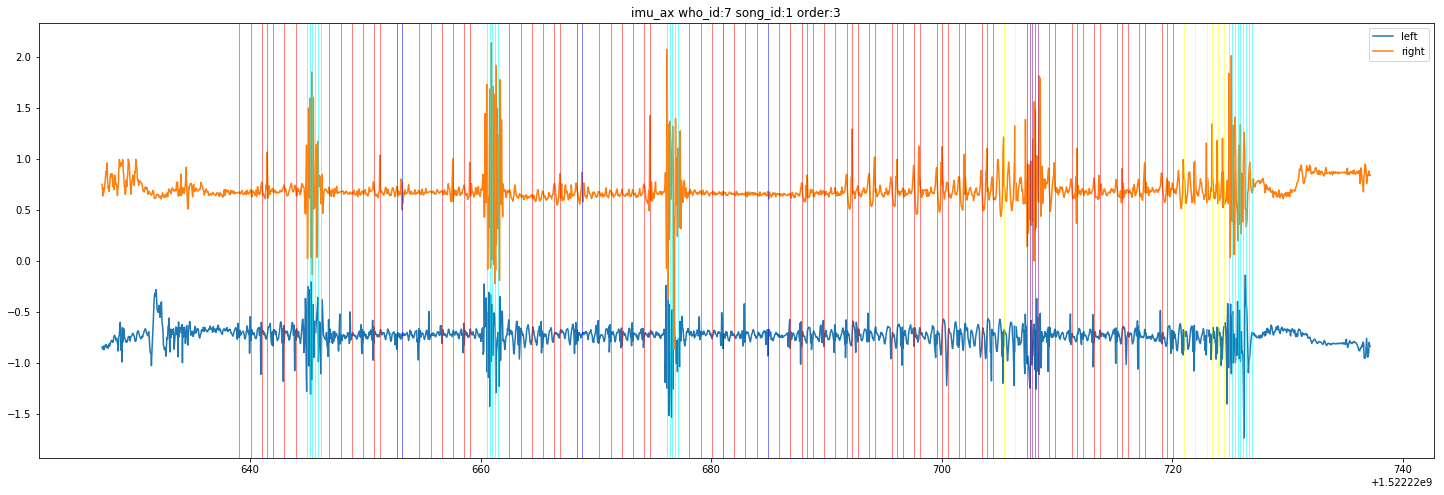

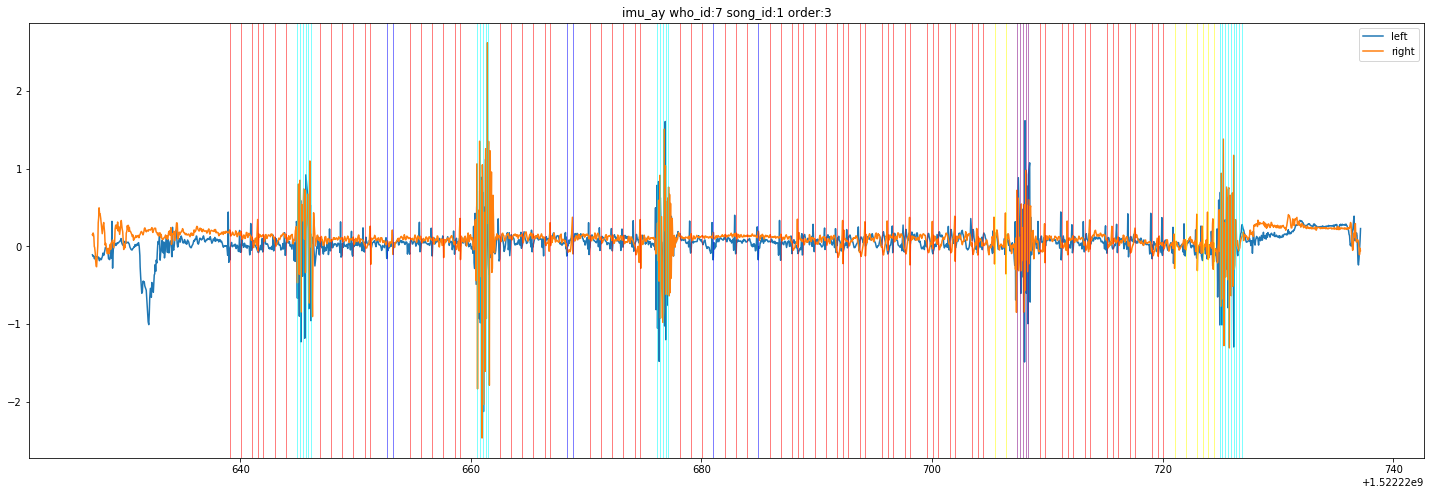

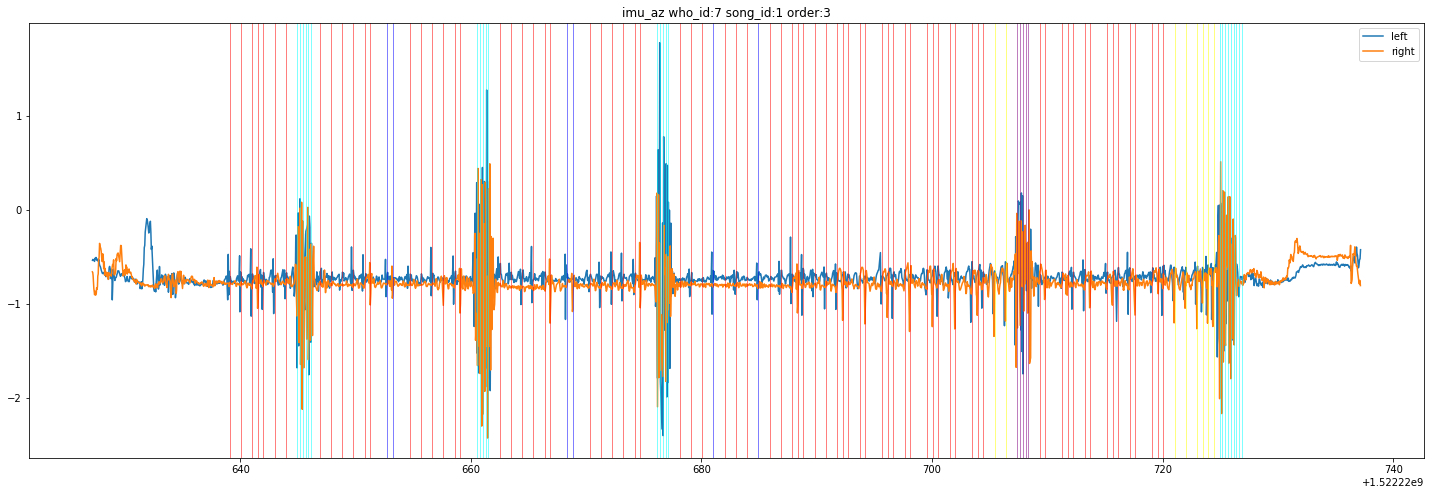

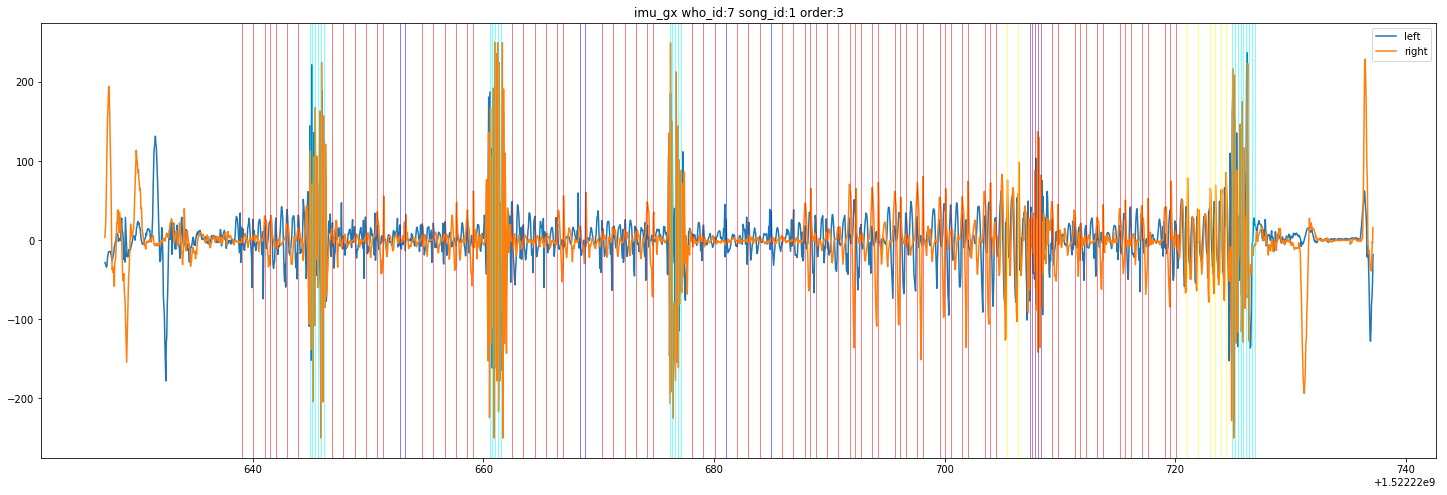

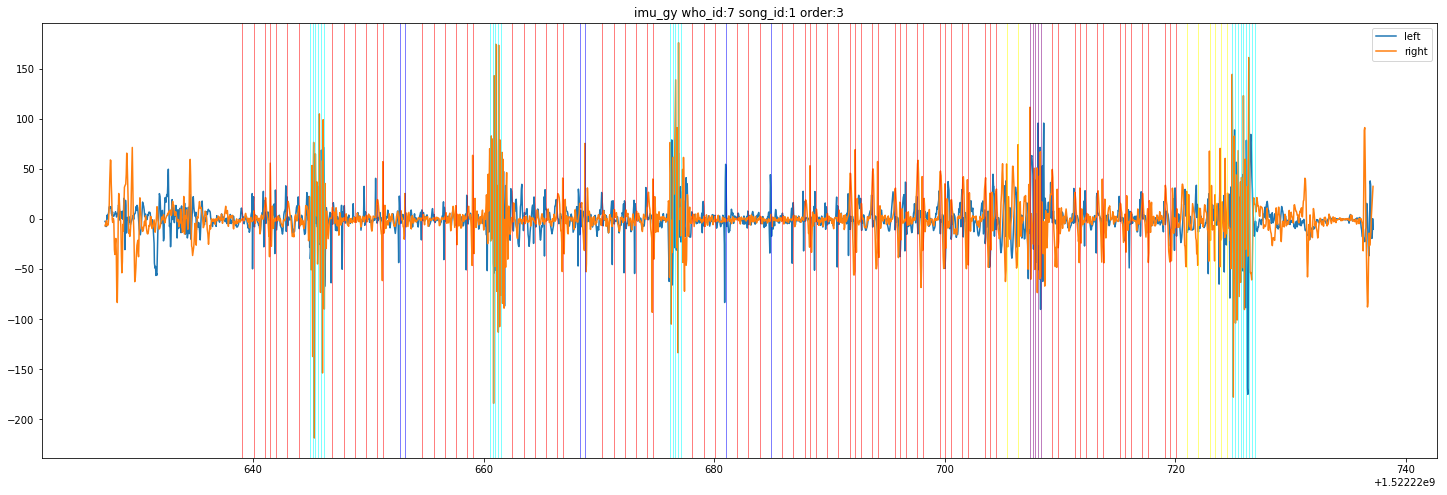

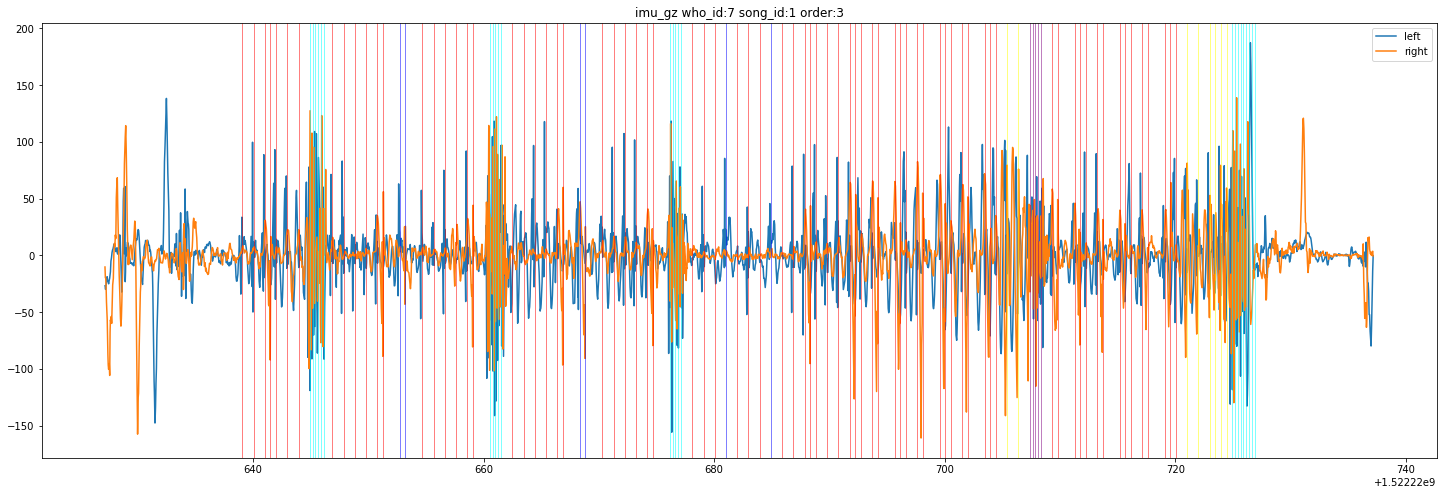

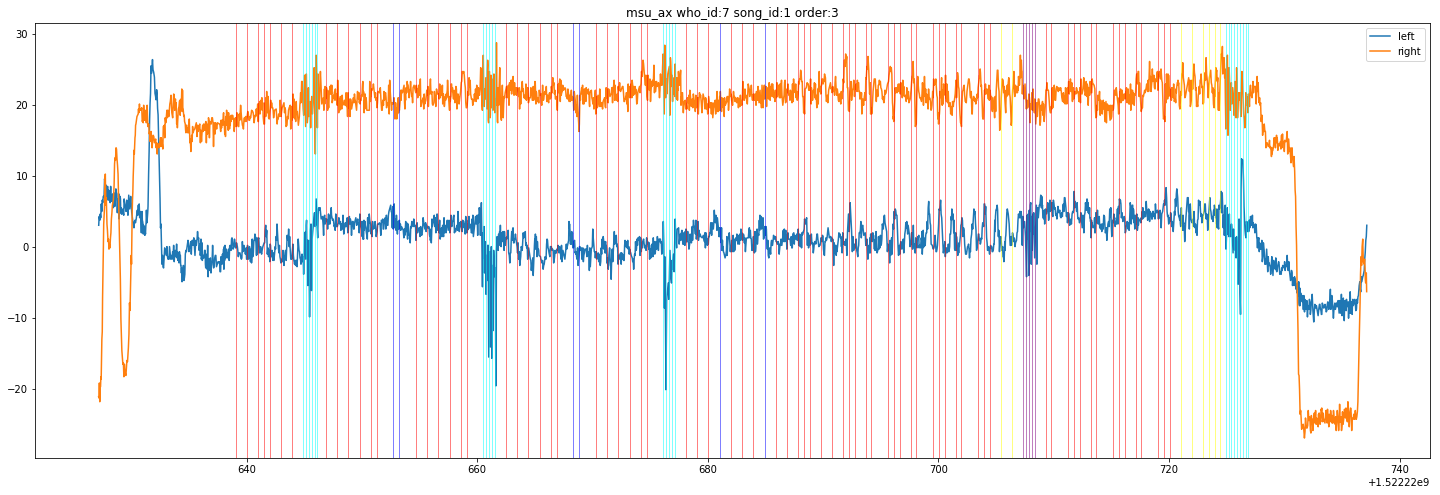

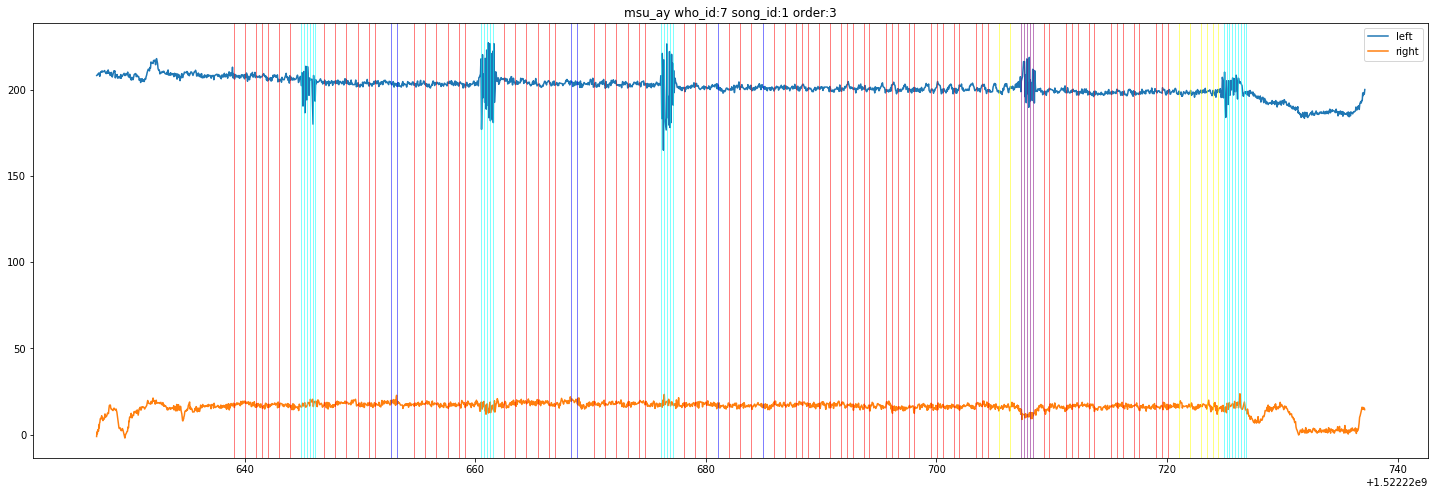

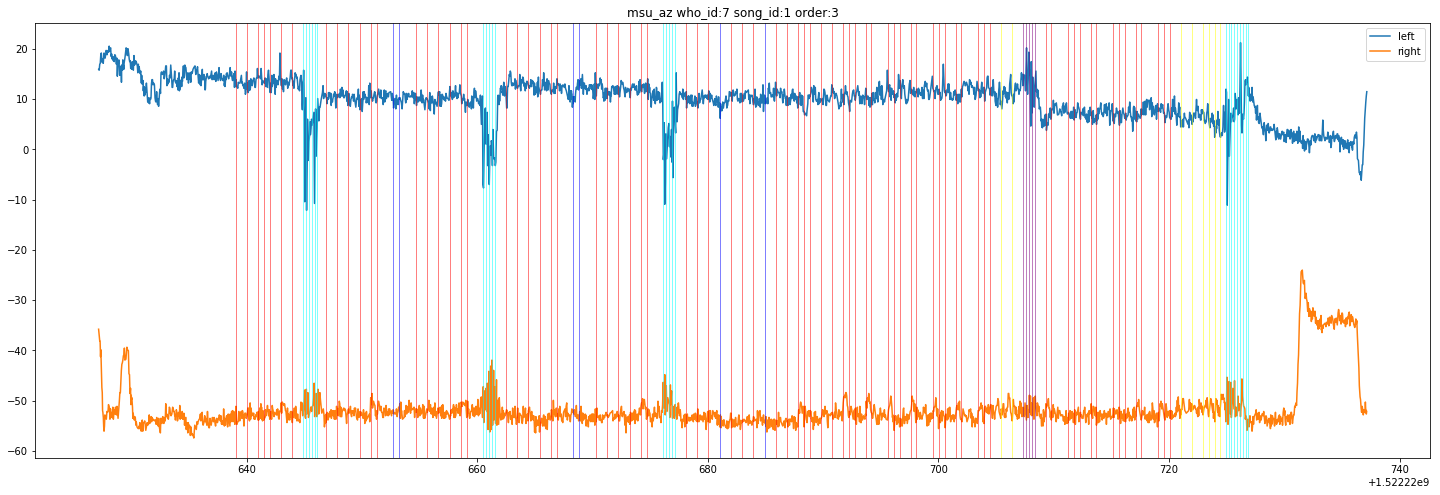

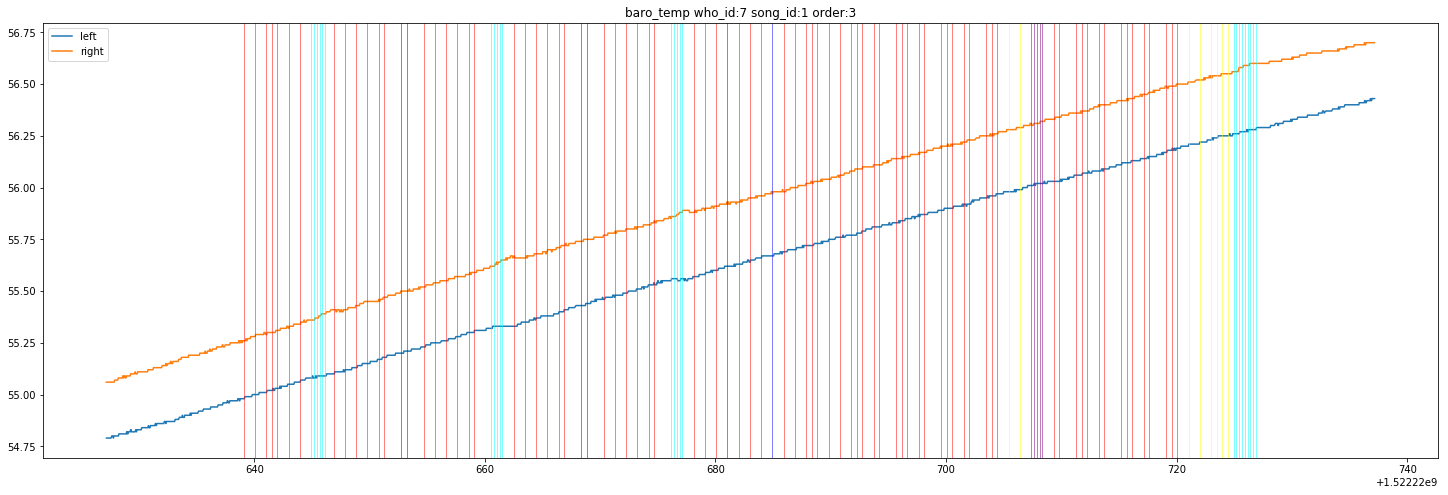

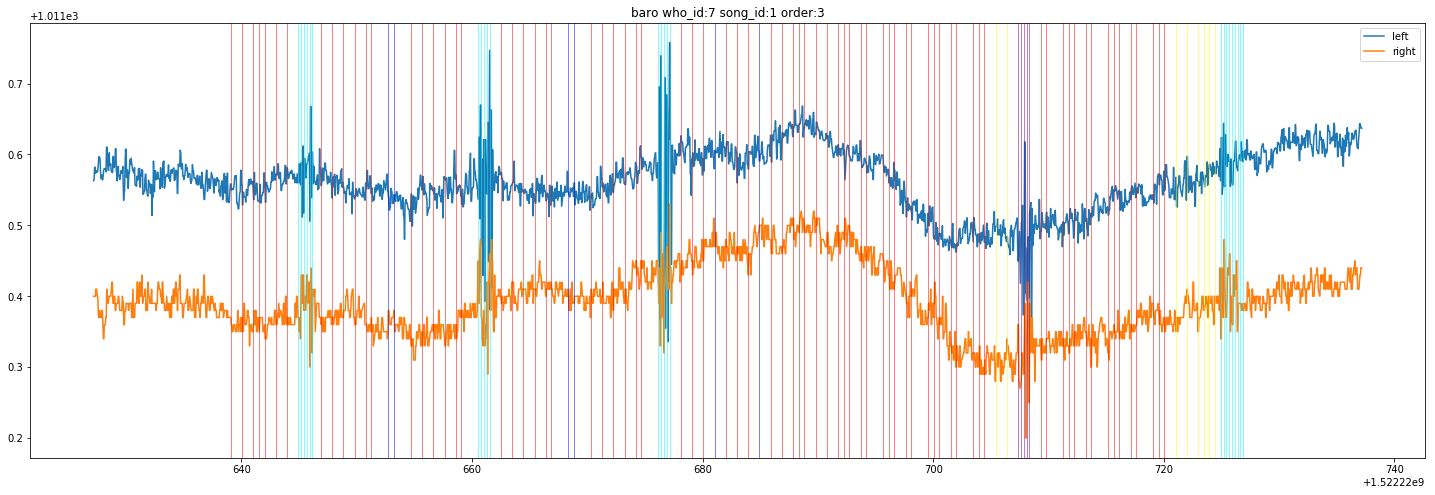

In [6]:
# the times are picked by artificial observation
first_hit_time = 1522220639.08
start_time = 1522220627.1636708
end_time = start_time + 110

for col in left_df:
    if col != 'timestamp' and col != 'wall_time':
        plt.figure(figsize=(25, 8))
       
        # retrieve left arm info
        play_df = left_df[(left_df['timestamp'] >= start_time) & (left_df['timestamp'] <= end_time)]
        plt.plot(play_df['timestamp'], play_df[col], label='left')
        
        # retrieve right arm info
        play_df = right_df[(right_df['timestamp'] >= start_time) & (right_df['timestamp'] <= end_time)]
        plt.plot(play_df['timestamp'], play_df[col], label='right')
        
        # draw vertical mark line
        for i in range(len(song_df)):
            row = song_df.iloc[i]
            hit_type = int(row['label'])
            if hit_type > 0:
                plt.axvline(first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
#             print(row)
        
        plt.legend()
        save_name = '%s who_id:%d song_id:%d order:%d' % (col, 7, 1, 3)
        plt.title(save_name)
#       plt.savefig(directory + '/' + save_name + '.png')
        plt.show()
        plt.close()

# RMS

## Consider <font color='red'> left </font> arm

In [7]:
play_df = left_df[(left_df['timestamp'] >= start_time)
                  & (left_df['timestamp'] <= end_time)]
# plt.plot(play_df['timestamp'], play_df[col], label='left')
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (play_df['imu_ax'] * play_df['imu_ax'] +
          play_df['imu_ay'] * play_df['imu_ay'] +
          play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
rms_df

,timestamp,imu_ax,imu_ay,imu_az,rms
388062,1.522221e+09,-0.844,-0.109,-0.539,1.007342
388063,1.522221e+09,-0.863,-0.129,-0.529,1.020417
388064,1.522221e+09,-0.860,-0.120,-0.539,1.022018
388065,1.522221e+09,-0.833,-0.144,-0.536,1.000960
388066,1.522221e+09,-0.869,-0.161,-0.551,1.041481
388067,1.522221e+09,-0.848,-0.135,-0.517,1.002306
388068,1.522221e+09,-0.832,-0.133,-0.529,0.994864
388069,1.522221e+09,-0.818,-0.134,-0.509,0.972708
388070,1.522221e+09,-0.820,-0.133,-0.536,0.988628
388071,1.522221e+09,-0.846,-0.134,-0.539,1.012024


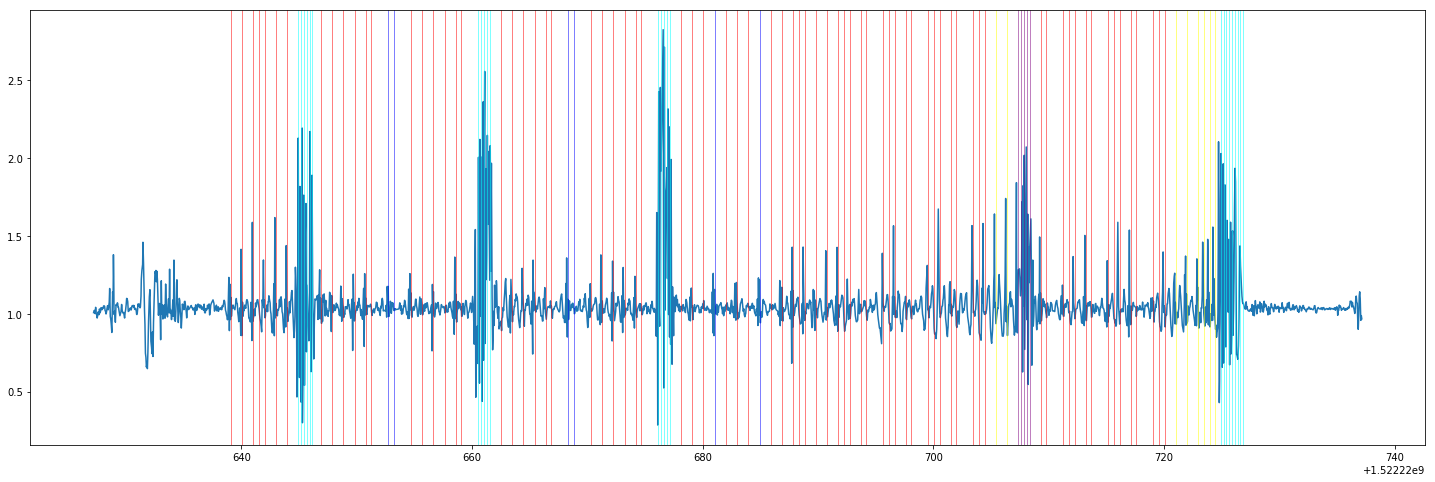

In [8]:
plt.figure(figsize=(25, 8))
plt.plot(rms_df['timestamp'], rms_df['rms'], label='left')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        plt.axvline(first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
plt.show()

## consider <font color='red'> right </font> arm

In [9]:
play_df = right_df[(right_df['timestamp'] >= start_time)
                  & (right_df['timestamp'] <= end_time)]
# plt.plot(play_df['timestamp'], play_df[col], label='left')
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (play_df['imu_ax'] * play_df['imu_ax'] +
          play_df['imu_ay'] * play_df['imu_ay'] +
          play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
rms_df

,timestamp,imu_ax,imu_ay,imu_az,rms
314655,1.522221e+09,0.751,0.150,-0.662,1.012297
314656,1.522221e+09,0.711,0.138,-0.669,0.985965
314657,1.522221e+09,0.681,0.172,-0.703,0.993758
314658,1.522221e+09,0.638,0.154,-0.781,1.020157
314659,1.522221e+09,0.679,0.123,-0.841,1.087865
314660,1.522221e+09,0.674,-0.004,-0.883,1.110847
314661,1.522221e+09,0.720,-0.012,-0.905,1.156533
314662,1.522221e+09,0.702,-0.051,-0.865,1.115182
314663,1.522221e+09,0.759,-0.089,-0.889,1.172315
314664,1.522221e+09,0.787,-0.179,-0.910,1.216351


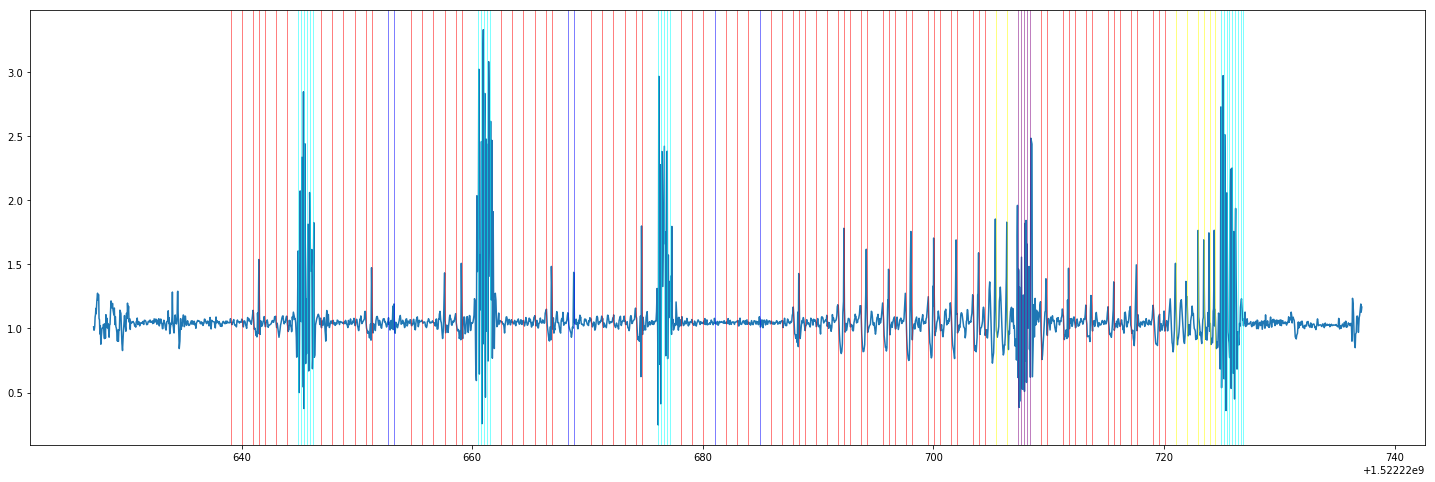

In [10]:
plt.figure(figsize=(25, 8))
plt.plot(rms_df['timestamp'], rms_df['rms'], label='right')

# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        plt.axvline(first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
plt.show()

## Put two arms together

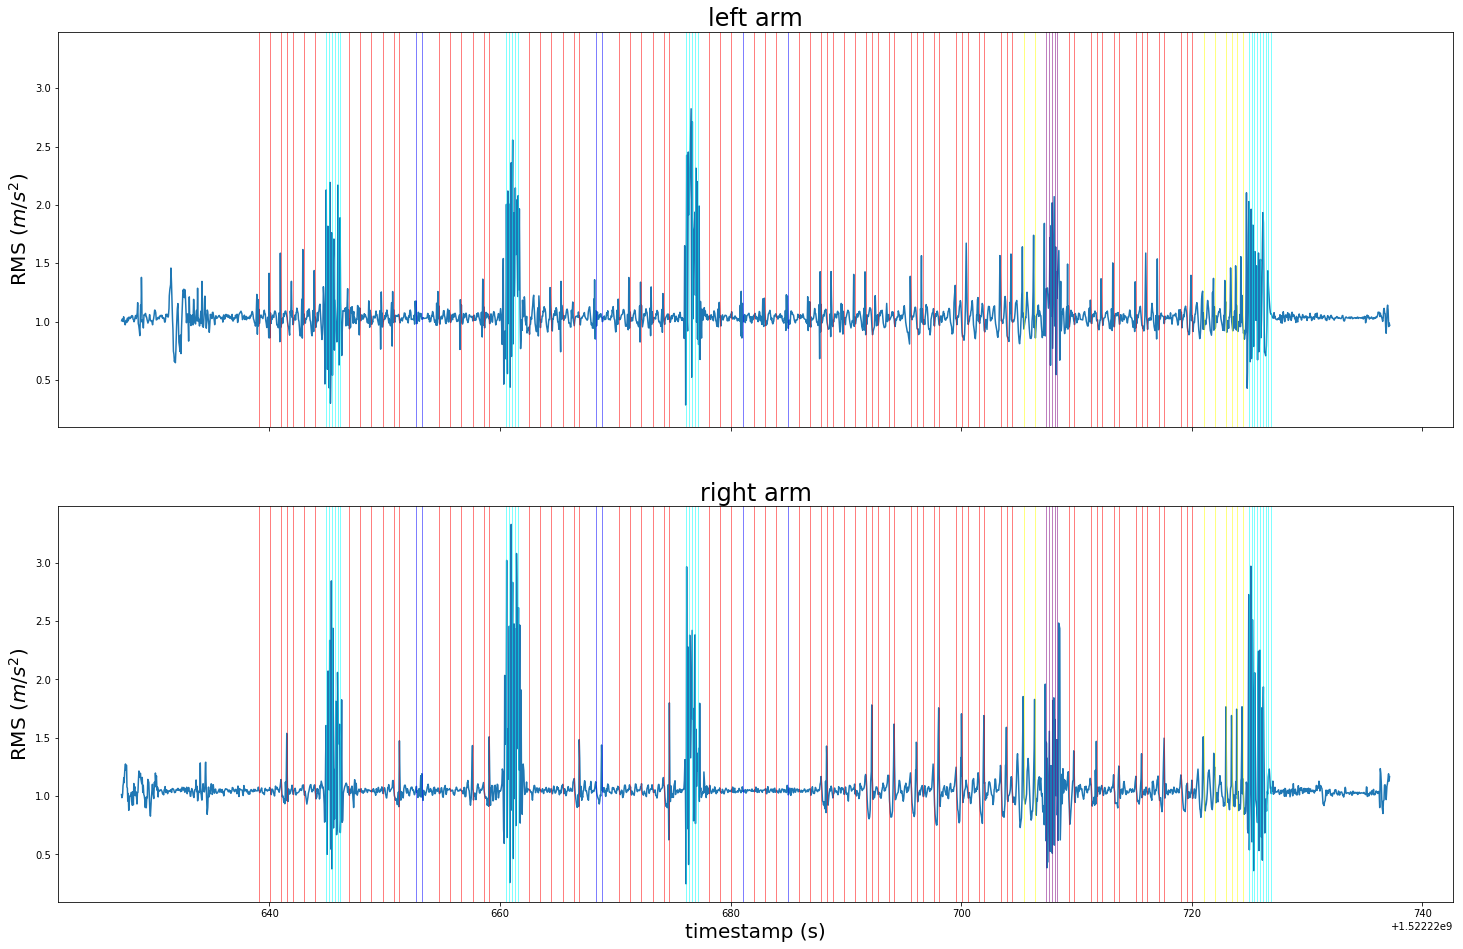

In [27]:
fig, ax = plt.subplots(2, 1, sharex='all', sharey='all', figsize=(25, 16))

# left arm
play_df = left_df[(left_df['timestamp'] >= start_time)
                  & (left_df['timestamp'] <= end_time)]
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (play_df['imu_ax'] * play_df['imu_ax'] +
          play_df['imu_ay'] * play_df['imu_ay'] +
          play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
ax[0].plot(rms_df['timestamp'], rms_df['rms'], label='left')

# right arm
play_df = right_df[(right_df['timestamp'] >= start_time)
                  & (right_df['timestamp'] <= end_time)]
rms_df = play_df[['timestamp', 'imu_ax', 'imu_ay', 'imu_az']].copy()
rms_df['rms'] = (play_df['imu_ax'] * play_df['imu_ax'] +
          play_df['imu_ay'] * play_df['imu_ay'] +
          play_df['imu_az'] * play_df['imu_az']).apply(lambda x: math.sqrt(x))
ax[1].plot(rms_df['timestamp'], rms_df['rms'], label='right')


# draw vertical mark line
for i in range(len(song_df)):
    row = song_df.iloc[i]
    hit_type = int(row['label'])
    if hit_type > 0:
        ax[0].axvline(first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
        ax[1].axvline(first_hit_time + row['timestamp'], color=COLORS[hit_type], lw=0.5)
        
ax[0].set_title('left arm', fontsize=24)
ax[1].set_title('right arm', fontsize=24)
ax[1].set_xlabel('timestamp (s)', fontsize=20)
ax[0].set_ylabel('RMS ($m/s^2$)', fontsize=20)
ax[1].set_ylabel('RMS ($m/s^2$)', fontsize=20)

plt.show()